In [1]:
#June 6

import ares
import numpy as np
import matplotlib.pyplot as pl
from ..physics.Constants import 

In [2]:
pop_halo = ares.populations.HaloPopulation()
data = ares.analysis.GalaxyPopulation() #for lit values

Whitaker2014

In [53]:
#[a, b, c] - from Table 1
polyPara = [[-27.4, -26.03, -24.04, -19.99], [5.02, 4.62, 4.17, 3.44], [-0.22, -0.19, -0.16, -0.13]]
#4.1. Polynomial
def polyFit(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    return polyPara[0][i] + polyPara[1][i]*np.log10(mass) + polyPara[2][i]*(np.log10(mass))**2 #Equ 2

#From Table 3
b = [1.11, 1.31, 1.49, 1.62]
def pl_HL(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    alpha_L = 0.95 + 0.02*z
    alpha_H = 0.03 + 0.31*z #Equ 4
        
    a = []
    for m in mass:
        if m <= 10**10.2:
            a.append(alpha_L)
        else:
            a.append(alpha_H)
    
    return a*(np.log10(mass)-10.2) + b[i] #Equ 3

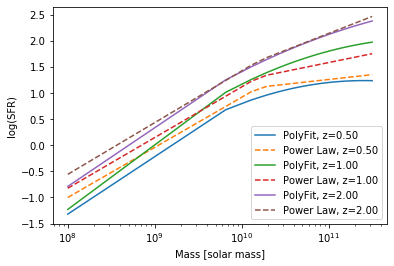

In [54]:
Sm = np.linspace(10**8.0, 10**11.5)

for z in [0.5, 1, 2]:
    SFR_P = polyFit(z, Sm)
    # print(SFR)
    SFR_pl = pl_HL(z, Sm)

    pl.semilogx(Sm, SFR_P, label="PolyFit, z=%.2f" %z)
    pl.semilogx(Sm, SFR_pl, label="Power Law, z=%.2f" %z, ls="--")

pl.legend()
pl.ylabel('log(SFR)')
pl.xlabel('Mass [solar mass]')
# pl.title('')

# pl.ylim(1e-25, 10)
pl.show()